<a href="https://colab.research.google.com/github/DCDPUAEM/DCDP/blob/main/02-Machine-Learning/notebooks/06-SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SVM

En esta notebook mostraremos el uso del clasificador **SVM** (Support Vector Machine). Realizaremos un ejemplo con datos artificiales, con fines didácticos, y un ejemplo más grande, con datos reales.

Usaremos la implementación de sklearn, llamada [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) (Support Vector Classifier)

## Ejemplo 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Funciones que necesitamos para graficar las fronteras de decisión

In [2]:
def make_meshgrid(x, y, h=.02):
    '''
    función para hacer la malla de puntos para colorear las regiones de decisión,
    la malla de puntos abarca la región donde se encuentran los puntos (x,y)
    'h' es el tamaño de paso
    '''
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

### El conjunto de datos

Creamos un conjunto de datos con una condición XOR

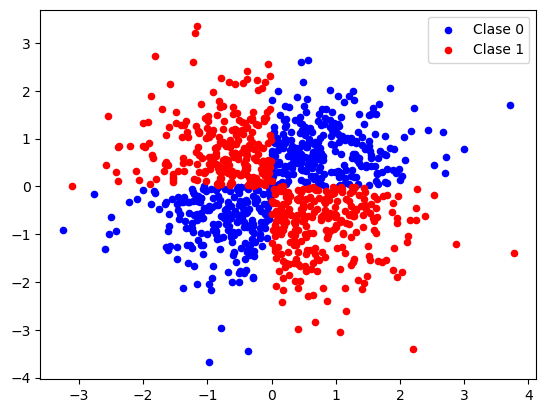

In [3]:
np.random.seed(17) # Fijamos un seed para la reproducibilidad de resultados

X = np.random.randn(1000, 2)
Y = np.array([int(np.logical_xor(x[0] > 0, x[1] > 0)) for x in X])

plt.figure()
plt.scatter(X[Y==0, 0], X[Y==0, 1], s=20, color='blue', label='Clase 0')
plt.scatter(X[Y==1, 0], X[Y==1, 1], s=20, color='red',label='Clase 1')
plt.legend()
plt.show()

Separamos el conjunto de datos en train y test.

In [4]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2023)

print(f"X Train: {x_train.shape}")
print(f"X Test: {x_test.shape}")
print(f"Y Train: {y_train.shape}")
print(f"Y Test: {y_test.shape}")

X Train: (800, 2)
X Test: (200, 2)
Y Train: (800,)
Y Test: (200,)


### Clasificación

Training mean accuracy: 0.629
Test mean accuracy: 0.655
Test recall: 0.814


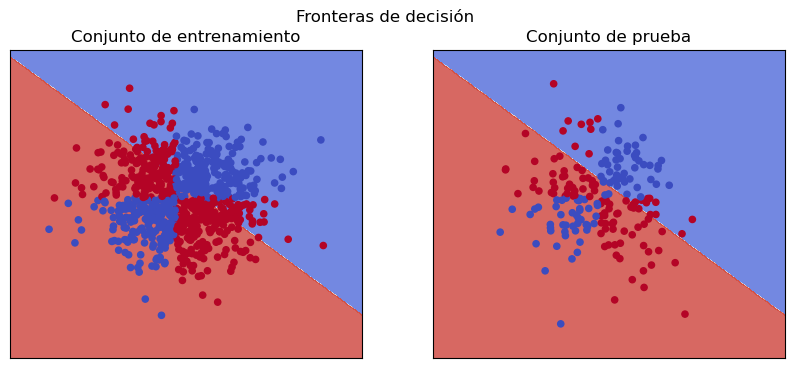

In [19]:
#### SVM lineal
#Entrenemos el clasificador usando el kernel lineal. Observar que, por default, $C=1$.
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score

clf = SVC(kernel='linear')
clf.fit(x_train, y_train)
# Observemos el accuracy en el conjunto de entrenamiento y prueba. En este caso, el método `score` de la clase `SVC` calcula el accuracy.
print(f"Training mean accuracy: {round(clf.score(x_train, y_train),3)}")
print(f"Test mean accuracy: {round(clf.score(x_test, y_test),3)}")
y_pred_test = clf.predict(x_test)
recall = recall_score(y_test, y_pred_test)
print(f"Test recall: {round(recall, 3)}")
#Observemos la frontera de decisión calculada por el clasificador y los conjuntos de entrenamiento y prueba.
xx, yy = make_meshgrid(X[:,0], X[:,1]) # Hacemos el grid para graficar las regiones

fig, (ax1, ax2) = plt.subplots(1,2,dpi=100,figsize=(10,4)) # El parámetro dpi especifíca los puntos por pulgada (DPI) de la imagen

fig.suptitle("Fronteras de decisión")

plot_contours(ax1, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax1.scatter(x_train[:,0], x_train[:,1], c=y_train, cmap=plt.cm.coolwarm, s=20)
ax1.set_xticks(())
ax1.set_yticks(())
ax1.set_title('Conjunto de entrenamiento')

plot_contours(ax2, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax2.scatter(x_test[:,0], x_test[:,1], c=y_test, cmap=plt.cm.coolwarm, s=20)
ax2.set_xticks(())
ax2.set_yticks(())
ax2.set_title('Conjunto de prueba')

plt.show()

Training mean accuracy: 0.541
Test mean accuracy: 0.54
Test recall: 1.0


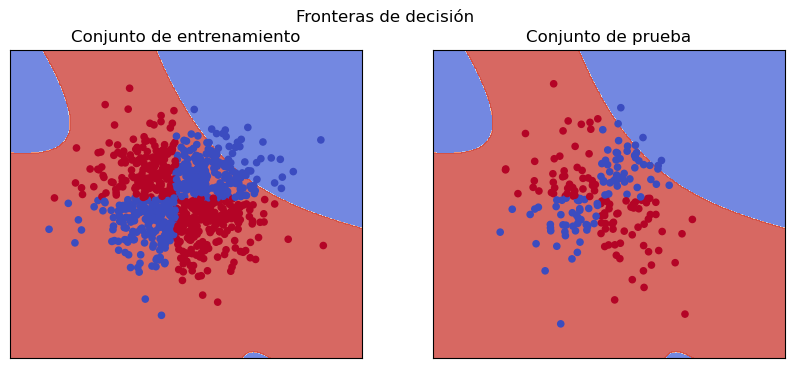

In [17]:
#### SVM Poly
#Entrenemos el clasificador usando el kernel lineal. Observar que, por default, $C=1$.
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score

clf = SVC(kernel='poly')
clf.fit(x_train, y_train)
# Observemos el accuracy en el conjunto de entrenamiento y prueba. En este caso, el método `score` de la clase `SVC` calcula el accuracy.
print(f"Training mean accuracy: {round(clf.score(x_train, y_train),3)}")
print(f"Test mean accuracy: {round(clf.score(x_test, y_test),3)}")
y_pred_test = clf.predict(x_test)
recall = recall_score(y_test, y_pred_test)
print(f"Test recall: {round(recall, 3)}")
#Observemos la frontera de decisión calculada por el clasificador y los conjuntos de entrenamiento y prueba.
xx, yy = make_meshgrid(X[:,0], X[:,1]) # Hacemos el grid para graficar las regiones

fig, (ax1, ax2) = plt.subplots(1,2,dpi=100,figsize=(10,4)) # El parámetro dpi especifíca los puntos por pulgada (DPI) de la imagen

fig.suptitle("Fronteras de decisión")

plot_contours(ax1, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax1.scatter(x_train[:,0], x_train[:,1], c=y_train, cmap=plt.cm.coolwarm, s=20)
ax1.set_xticks(())
ax1.set_yticks(())
ax1.set_title('Conjunto de entrenamiento')

plot_contours(ax2, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax2.scatter(x_test[:,0], x_test[:,1], c=y_test, cmap=plt.cm.coolwarm, s=20)
ax2.set_xticks(())
ax2.set_yticks(())
ax2.set_title('Conjunto de prueba')

plt.show()

Training mean accuracy: 0.99
Test mean accuracy: 0.995
Test recall: 1.0


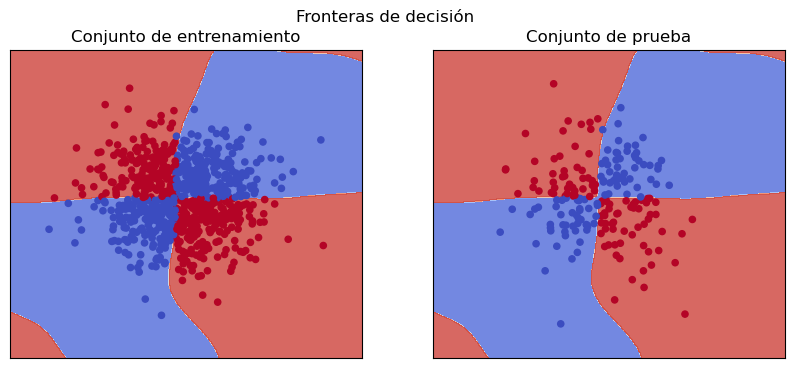

In [16]:
#### SVM rbf
#Entrenemos el clasificador usando el kernel lineal. Observar que, por default, $C=1$.
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score

clf = SVC(kernel='rbf')
clf.fit(x_train, y_train)
# Observemos el accuracy en el conjunto de entrenamiento y prueba. En este caso, el método `score` de la clase `SVC` calcula el accuracy.
print(f"Training mean accuracy: {round(clf.score(x_train, y_train),3)}")
print(f"Test mean accuracy: {round(clf.score(x_test, y_test),3)}")
y_pred_test = clf.predict(x_test)
recall = recall_score(y_test, y_pred_test)
print(f"Test recall: {round(recall, 3)}")
#Observemos la frontera de decisión calculada por el clasificador y los conjuntos de entrenamiento y prueba.
xx, yy = make_meshgrid(X[:,0], X[:,1]) # Hacemos el grid para graficar las regiones

fig, (ax1, ax2) = plt.subplots(1,2,dpi=100,figsize=(10,4)) # El parámetro dpi especifíca los puntos por pulgada (DPI) de la imagen

fig.suptitle("Fronteras de decisión")

plot_contours(ax1, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax1.scatter(x_train[:,0], x_train[:,1], c=y_train, cmap=plt.cm.coolwarm, s=20)
ax1.set_xticks(())
ax1.set_yticks(())
ax1.set_title('Conjunto de entrenamiento')

plot_contours(ax2, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax2.scatter(x_test[:,0], x_test[:,1], c=y_test, cmap=plt.cm.coolwarm, s=20)
ax2.set_xticks(())
ax2.set_yticks(())
ax2.set_title('Conjunto de prueba')

plt.show()

Training mean accuracy: 0.484
Test mean accuracy: 0.51
Test recall: 0.588


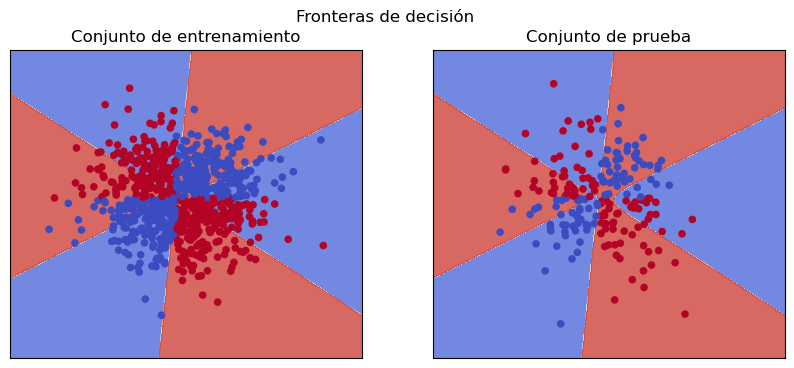

Test accuracy: 0.51
Test recall: 0.588


In [15]:
#### SVM sigmoid
#Entrenemos el clasificador usando el kernel lineal. Observar que, por default, $C=1$.
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score

clf = SVC(kernel='sigmoid')
clf.fit(x_train, y_train)
# Observemos el accuracy en el conjunto de entrenamiento y prueba. En este caso, el método `score` de la clase `SVC` calcula el accuracy.
print(f"Training mean accuracy: {round(clf.score(x_train, y_train),3)}")
print(f"Test mean accuracy: {round(clf.score(x_test, y_test),3)}")
y_pred_test = clf.predict(x_test)
recall = recall_score(y_test, y_pred_test)
print(f"Test recall: {round(recall, 3)}")
#Observemos la frontera de decisión calculada por el clasificador y los conjuntos de entrenamiento y prueba.
xx, yy = make_meshgrid(X[:,0], X[:,1]) # Hacemos el grid para graficar las regiones

fig, (ax1, ax2) = plt.subplots(1,2,dpi=100,figsize=(10,4)) # El parámetro dpi especifíca los puntos por pulgada (DPI) de la imagen

fig.suptitle("Fronteras de decisión")

plot_contours(ax1, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax1.scatter(x_train[:,0], x_train[:,1], c=y_train, cmap=plt.cm.coolwarm, s=20)
ax1.set_xticks(())
ax1.set_yticks(())
ax1.set_title('Conjunto de entrenamiento')

plot_contours(ax2, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax2.scatter(x_test[:,0], x_test[:,1], c=y_test, cmap=plt.cm.coolwarm, s=20)
ax2.set_xticks(())
ax2.set_yticks(())
ax2.set_title('Conjunto de prueba')

plt.show()

#### ⭕ Probar otros kernels

Con los mismos conjuntos de prueba y entrenamiento:

1. Repetir el experimento de clasificación de arriba, usando otros kernels.
2. En cada caso que pruebes grafica los puntos (los de prueba) y la frontera de decisión.
3. En cada caso, reporta el valor de accuracy y recall, usando el conjunto de prueba solamente.

**¿Qué kernel parece dar mejor resultado?**

Documentación: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

# R = POLY CON GRADO 2

* El kernel lineal es mejor para datos linealmente separables. Es una opción cuando el conjunto de datos es grande.
* El kernel Gaussiano (RBF) tiende a dar buenos resultados cuando no se tiene información adicional sobre los datos.
* Los kernels polinomiales tienden a dar buenos resultados cuando los datos de entrenamiento están normalizados.

[El truco del kernel](https://www.geogebra.org/m/xawkavxe)

⭕ Prueba también con otros valores de `C` y repite los pasos de arriba, ¿qué efecto tiene el modificar este valor en la clasificación?

# R = VALORES MÁS ALTOS DE C TIENDEN A INCREMENTAR EL SOBREAJUSTE

### Usando gridsearch para encontrar los mejores parámetros

[GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) toma un estimador (por ejemplo, SVM) y un conjunto de parámetros del estimador. Sobre estos parámetros hace una busqueda para encontrar la combinación de parámetros que da mejores resultados en el estimador.

GridSearchCV tiene métodos “fit” y “score” method, entre otros. Es decir, no es necesario tomar los parámetros e introducirlos en el estimador.

In [20]:
from sklearn.model_selection import GridSearchCV

Encuentra los mejores parámetros para el clasificador SVM utilizando grid search. Guíate por el desempeño en el set de entrenamiento y validación.

Prueba los siguientes hyperparámetros.
* kernel = linear, polynomial, rbf
* C = 0.01, 0.1, 1.0, 10, 100
* grado del polinomio = 1, 2, 3, 4 (solo para el kernel polinomial)
* gamma = auto, scale:

Definimos los parámetros sobre los que se hará la busqueda

In [21]:
param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'kernel': ('linear', 'poly', 'rbf'),
              'degree': [1, 2, 3, 4], 'gamma': ('auto', 'scale')}
param_grid

{'C': [0.01, 0.1, 1, 10, 100],
 'kernel': ('linear', 'poly', 'rbf'),
 'degree': [1, 2, 3, 4],
 'gamma': ('auto', 'scale')}

Realizamos una busqueda sobre estos parámetros

In [22]:
clf = SVC()
gs = GridSearchCV(clf, param_grid)
gs.fit(x_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'degree': [1, 2, 3, 4],
                         'gamma': ('auto', 'scale'),
                         'kernel': ('linear', 'poly', 'rbf')})

Veamos los mejores hiper-parámetros

In [23]:
print(f"Best score: {gs.best_score_:.4f}")
print(f"Best params: {gs.best_params_}")

Best score: 0.9850
Best params: {'C': 100, 'degree': 2, 'gamma': 'auto', 'kernel': 'poly'}


Definamos un clasificador SVM con estos mejores hiperparámetros

In [24]:
best_svm = SVC(C=100, kernel='poly', degree=2, gamma='auto')
best_svm.fit(x_train, y_train)

print(f"Train mean accuracy: {best_svm.score(x_train, y_train):6.4f}")
print(f"Test mean accuracy: {best_svm.score(x_test, y_test):6.4f}")

Train mean accuracy: 0.9962
Test mean accuracy: 0.9950


Graficamos la frontera de decisión

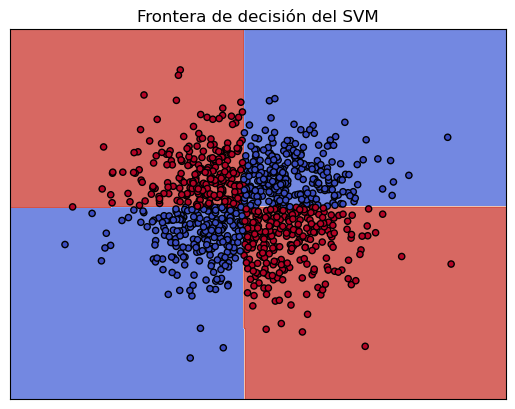

In [25]:
xx, yy = make_meshgrid(X[:,0], X[:,1]) # Hacemos el grid para graficar las regiones

fig, ax = plt.subplots(dpi=100)  # El parámetro dpi especifíca los puntos por pulgada (DPI) de la imagen
plot_contours(ax, best_svm, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X[:,0], X[:,1], c=Y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title('Frontera de decisión del SVM')
plt.show()

### Comparando el SVM lineal con el OLS (clasificador lineal)

En este ejercicio vamos a comparar la clasificación y la frontera de decisión del clasificador de la sesión anterior (discriminante lineal OLS) con el SVM con kernel lineal.

Para esto, vamos a usar ambos clasificadores en el mismo conjunto de datos. Después, compararemos la frontera de decisión.

Dado que el clasificador lo implementamos como una clase, podemos usarlo en esta notebook directamente. Hay dos maneras de hacerlo:

* Copiando el código y definiendo la clase otra vez:
* Descargando el archivo desde github:

In [30]:
#url = "https://raw.githubusercontent.com/DCDPUAEM/DCDP/main/02-Machine-Learning/data/clasificador_lineal.py"
#!curl -O {url}


Ya está copiado en la misma carpeta donde estamos trabajando por lo que ya lo podemos importar directamente

In [31]:
#from clasificador_lineal import LeastSquaresClassifier

In [32]:
import numpy as np

class LeastSquaresClassifier():
    def __init__(self, W:np.ndarray=None):
        '''
        W es la matriz de pesos, la cual puede ser especificada desde un principio, esto
        es opcional.
        '''
        self.W = W

    def encoderT(self, y:np.ndarray):
        K = np.max(y) + 1
        identidad = np.eye(K)
        return identidad[y]

    def fit(self, X:np.ndarray, y:np.ndarray):
        '''
        Este método calcula la matriz de pesos para la matriz de puntos "aumentada" X
        y el conjunto de etiquetas y.
        '''
        T = self.encoderT(y)
        self.W = np.linalg.inv(X.T @ X) @ X.T @ T

    def clasifica(self, X:np.ndarray):
        '''
        Este método predice las etiquetas para el conjunto de puntos X
        '''
        return np.argmax(X@self.W,axis=1)


Definimos el conjunto de datos, usaremos un dataset de scikit-learn:

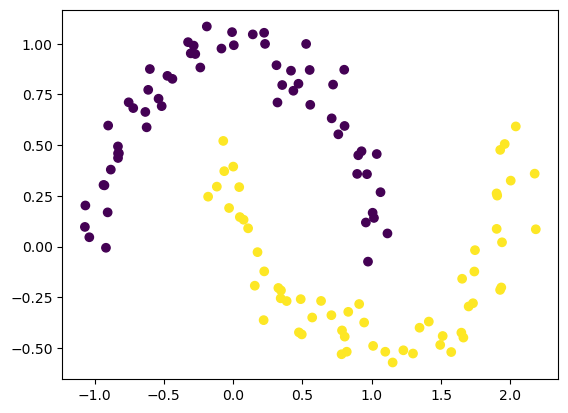

In [33]:
from sklearn.datasets import make_moons

x_train, y_train = make_moons(n_samples = 120, random_state=89, noise=0.1)

#--- Lo graficamos para verlo ---
plt.figure()
plt.scatter(x_train[:,0], x_train[:,1], c=y_train)
plt.show()

⭕ Realiza la clasificación usando el clasificador OLS y grafica la frontera de decisión.

Puedes usar el código para clasificar y graficar que usamos en la sesión anterior

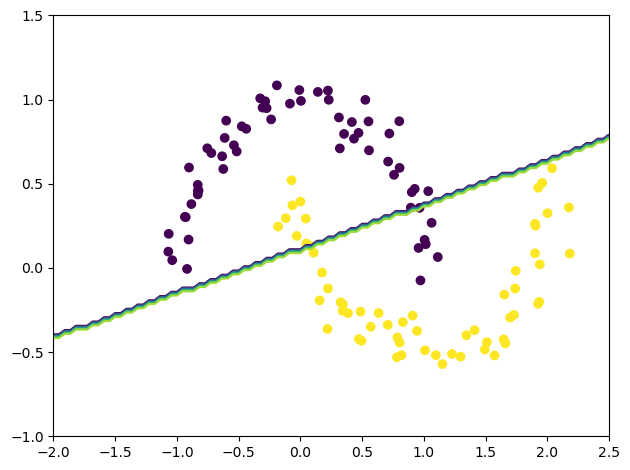

In [34]:
from sklearn.preprocessing import PolynomialFeatures

x1_test, x2_test = np.meshgrid(np.linspace(-2, 2.5, 100), np.linspace(-1, 1.5, 100))
x_test = np.array([x1_test, x2_test]).reshape(2, -1).T

features = PolynomialFeatures(1)
X_train = features.fit_transform(x_train)
X_test = features.fit_transform(x_test)

#------ COMPLETAR ------
modelo = LeastSquaresClassifier()
modelo.fit(X_train,y_train)
y_ols = modelo.clasifica(X_test)
#----------------------

plt.figure()
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
plt.contour(x1_test, x2_test, y_ols.reshape(100, 100))
plt.tight_layout()
plt.show()

⭕ Ahora, usemos SVM lineal

Realiza la clasificación en el mismo dataset, usando SVM con kernel lineal y grafica la frontera de decisión. Puedes usar el código para clasificar y graficar que usamos anteriormente.

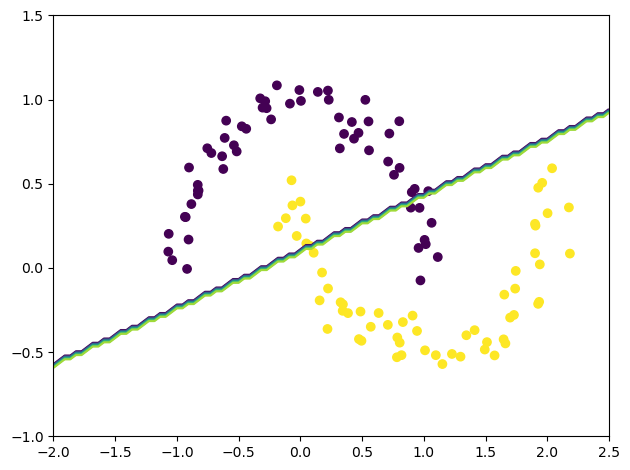

In [35]:
x1_test, x2_test = np.meshgrid(np.linspace(-2, 2.5, 100), np.linspace(-1, 1.5, 100))
x_test = np.array([x1_test, x2_test]).reshape(2, -1).T

#------ COMPLETAR ------
lin_svm = SVC(kernel='linear')
lin_svm.fit(x_train, y_train)
y_svm = lin_svm.predict(x_test)
#----------------------

plt.figure()
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
plt.contour(x1_test, x2_test, y_svm.reshape(100, 100))
plt.tight_layout()
plt.show()


Dibujamos ambas FD juntas.

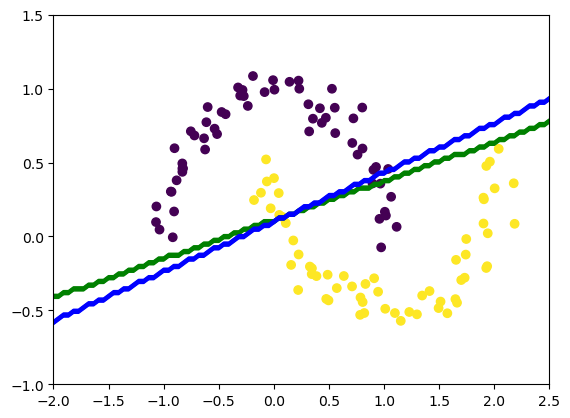

In [36]:
plt.figure()
#-----Dibujar los datos---------------------------------
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
#-----Dibujar X_test (la malla de fondo para ver las regiones ------------
plt.contour(x1_test, x2_test, y_ols.reshape(100, 100),colors='green')
plt.contour(x1_test, x2_test, y_svm.reshape(100, 100),colors='blue')
plt.show()

Observar que no son la misma.

🔵 ¿Por qué no?

# R= PORQUE EN UNA USAMOS EL CLASIFICADOR OLS Y EL EL OTRO SVM 

## Ejemplo 2

Para este problema usaremos el datset de Kaggle.

**Contexto**

Los conjuntos de datos contienen transacciones realizadas con tarjetas de crédito en septiembre de 2013 por titulares de tarjetas europeos. Este conjunto de datos presenta transacciones que ocurrieron en dos días, donde tenemos 492 fraudes de 284,807 transacciones. El conjunto de datos está altamente desequilibrado, la clase positiva (fraudes) representa el 0.172% de todas las transacciones.

Contiene solo variables de entrada numéricas que son el resultado de una transformación PCA. Desafortunadamente, debido a problemas de confidencialidad, no se pueden obtener las características originales y más información de fondo sobre los datos. Las características $V_1$, $V_2$, ..., $V_{28}$ son los componentes principales obtenidos con PCA, las únicas características que no se han transformado con PCA son 'Tiempo' y 'Cantidad'. La función 'Tiempo' contiene los segundos transcurridos entre cada transacción y la primera transacción en el conjunto de datos. La característica 'Cantidad' es la Cantidad de la transacción, esta característica se puede utilizar para el aprendizaje sensible al costo dependiente del ejemplo. La característica 'Clase' es la variable de respuesta y toma el valor 1 en caso de fraude y 0 en caso contrario.


Recordemos las buenas prácticas del Machine Learning: https://scikit-learn.org/stable/common_pitfalls.html

Extraer el archivo zip

In [38]:
import numpy as np
import pandas as pd


credito = pd.read_csv("/Users/rod/Desktop/materias/machineLearning/cursoML_ene-jun2024/02-Machine-Learning/notebooks/data/creditcard.csv")

In [39]:

credito.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [40]:
credito.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


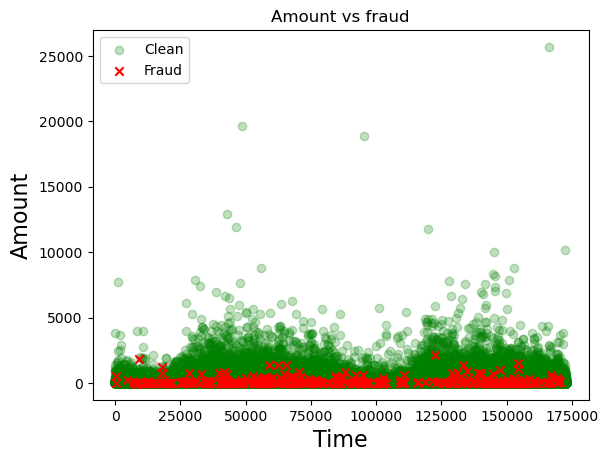

In [41]:
import matplotlib.pyplot as plt

plt.figure()

# Graficamos los que no son fraude
time_amount = credito[credito['Class'] == 0][['Time','Amount']].values
plt.scatter(time_amount[:,0], time_amount[:,1],
            c='green',alpha=0.25,label='Clean')
# Graficamos los que sí son fraude
time_amount = credito[credito['Class'] == 1][['Time','Amount']].values
plt.scatter(time_amount[:,0], time_amount[:,1],
            c='red',label='Fraud',marker='x')
plt.legend(loc='best')
plt.title('Amount vs fraud')
plt.xlabel('Time', fontsize=16)
plt.ylabel('Amount', fontsize=16)
plt.show()

/Users/rod/miniconda3/envs/crashcourse/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/rod/miniconda3/envs/crashcourse/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/rod/miniconda3/envs/crashcourse/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


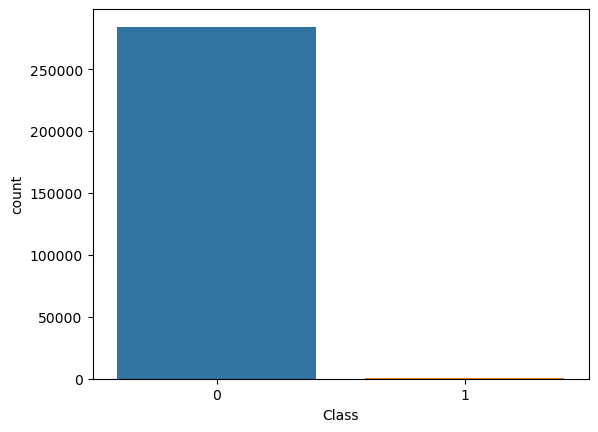

In [42]:
import seaborn as sns

plt.figure()
sns.countplot(x = "Class", data = credito)
plt.show()

In [43]:
No_of_frauds = credito[credito["Class"]==1].shape[0]
No_of_normals = credito[credito["Class"]==0].shape[0]
print("Hay {} transacciones normales (clase 0)".format(No_of_normals))
print("Hay {} transacciones fraudulentas (clase 1)".format(No_of_frauds))
total = No_of_frauds + No_of_normals
pf= (No_of_frauds / total)*100
pn= (No_of_normals / total)*100
print("Porcentaje clase 0 = {}%".format(np.round(pn,2)))
print("Porcentaje clase 1 = {}%".format(np.round(pf,2)))

Hay 284315 transacciones normales (clase 0)
Hay 492 transacciones fraudulentas (clase 1)
Porcentaje clase 0 = 99.83%
Porcentaje clase 1 = 0.17%


### Submuestro

Se necesita hacer un submuestreo para balancear las clases

* Está claro que la Clase 1 está subrepresentada ya que solo  representa el 0.17% de todo el conjunto de datos.
* Si entrenamos nuestro modelo usando este conjunto de datos, el modelo será ineficiente y será entrenado para predecir solo la Clase 0 porque no tendrá suficientes datos de entrenamiento.
* Podemos obtener una alta exactitud al probar el modelo, pero no debemos confundirnos con esto porque nuestro conjunto de datos no tiene datos de prueba equilibrados. Por lo tanto, tenemos que confiar en el recall que se basa en TP y FP.
* En los casos en que tengamos datos asimétricos, agregar datos adicionales de la característica subrepresentada (sobremuestreo) es una opción, mediante la modelación de la distribución de los datos. Por ahora no tenemos esa opción, así que tendremos que recurrir al submuestreo.
* El submuestreo del conjunto de datos implica mantener todos nuestros datos subrepresentados (Clase 1) mientras se muestrea el mismo número de características de la Clase 0 para crear un nuevo conjunto de datos que comprenda una representación igual de ambas clases.

Obtenemos un conjunto de datos más balanceado que contenga el doble de instancias no fraudulentas respecto a las fraudulentas

In [44]:
# lista los índices de fraude del data set completo
fraud_idxs = credito[credito["Class"]==1].index.to_list()

# lista de índices normales del data set completo
normal_idxs = credito[credito["Class"]==0].index.to_list()

# seleccionamos aleatoriamente el doble de índices de transacciones normales que de normales
random_normal_idxs = np.random.choice(normal_idxs, No_of_frauds*2, replace= False)

# concatenamos los índices fraudulentos y normales y creamos el dataframe sub-sampleado
undersampled_indices = np.concatenate([fraud_idxs, random_normal_idxs])
undersampled_data = credito.iloc[undersampled_indices, :]

print(f"Fraude: {len(fraud_idxs)}, Normales: {len(random_normal_idxs)}")
undersampled_data.head()

Fraude: 492, Normales: 984


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


Comprobemos que los datos quedaron balanceados

Número de transacciones normales (clase 0):  984
Número de transacciones fraudulentas (clase 1):  492
Número total de instancias:  1476
Porcentaje clase 0: 66.67
Porcentaje clase 1: 66.67


/var/folders/jq/kqb89wnx37ldb84l4_h_50q40000gn/T/ipykernel_62549/23521864.py:15: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_sampled = pd.value_counts(undersampled_data["Class"], sort= True)


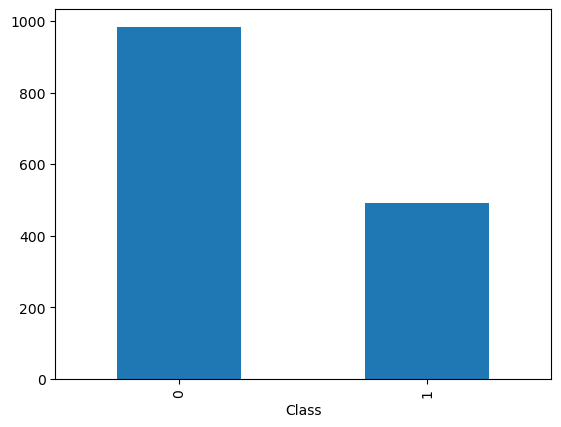

In [45]:
No_of_frauds_sampled = len(undersampled_data[undersampled_data["Class"]== 1])

No_of_normals_sampled = len(undersampled_data[undersampled_data["Class"]== 0])

print("Número de transacciones normales (clase 0): ", No_of_normals_sampled)
print("Número de transacciones fraudulentas (clase 1): ", No_of_frauds_sampled)
total_sampled = No_of_frauds_sampled + No_of_normals_sampled
print("Número total de instancias: ", total_sampled)

Fraud_percent_sampled = (No_of_frauds_sampled / total_sampled)*100
Normal_percent_sampled = (No_of_normals_sampled / total_sampled)*100
print(f"Porcentaje clase 0: {round(Normal_percent_sampled,2)}")
print(f"Porcentaje clase 1: {round(Normal_percent_sampled,2)}")

count_sampled = pd.value_counts(undersampled_data["Class"], sort= True)
count_sampled.plot(kind= 'bar')
plt.show()

In [46]:
# quitamos las columnas "Time" y "Amount"
undersampled_data.drop(["Time"], axis= 1,inplace=True)

/var/folders/jq/kqb89wnx37ldb84l4_h_50q40000gn/T/ipykernel_62549/1660367525.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  undersampled_data.drop(["Time"], axis= 1,inplace=True)


### Oversampling

Ahora haremos un proceso llamado [SMOTE: Synthetic Minority Over-sampling Technique](https://arxiv.org/abs/1106.1813)


Para ello necesitamos instalar la librería de _aprendizaje desequilibrado_ ``imbalanced-learn`` de Python.

**Oversampling ** es una técnica utilizada en el contexto del aprendizaje automático para abordar el desequilibrio de clases en conjuntos de datos, donde una clase tiene muchas más instancias que otra. El desequilibrio de clases puede afectar el rendimiento de los modelos de aprendizaje automático, ya que pueden aprender a favorecer la clase mayoritaria y tener dificultades para generalizar bien en la clase minoritaria.

**SMOTE** (Synthetic Minority Over-sampling Technique) es una técnica específica de oversampling que aborda este problema generando instancias sintéticas de la clase minoritaria. Fue propuesta por Nitesh V. Chawla, et al., en 2002.

Aquí hay una breve descripción del proceso SMOTE:

1. Identificación de instancias minoritarias: SMOTE se aplica a la clase minoritaria del conjunto de datos. Selecciona las instancias que pertenecen a la clase minoritaria.

2. Selección de vecinos cercanos: Para cada instancia seleccionada, SMOTE identifica sus k vecinos más cercanos en el espacio de características.

3. Generación de instancias sintéticas: SMOTE crea nuevas instancias sintéticas tomando la diferencia entre la instancia seleccionada y uno de sus vecinos cercanos, multiplicando esa diferencia por un número aleatorio entre 0 y 1, y sumando el resultado a la instancia original.

4. Incorporación de instancias sintéticas: Las nuevas instancias sintéticas se agregan al conjunto de datos, aumentando así el número de instancias de la clase minoritaria.

In [ ]:
!pip install imbalanced-learn

Podemos imprimir información sobre el módulo

In [48]:
import imblearn
print(imblearn.__version__)

0.12.2


Obtenemos la matriz de datos $X$ y el vector de clases $y$ correspondiente

In [49]:
X = undersampled_data.loc[:, undersampled_data.columns != "Class"].values
y = undersampled_data.loc[:, undersampled_data.columns == "Class"].values

print(f"Matriz de features: {X.shape}")
print(f"Matriz de etiquetas: {y.shape}")

Matriz de features: (1476, 29)
Matriz de etiquetas: (1476, 1)


Hagamos el proceso de sobre-muestreo [SMOTE](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html)

In [50]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X_oversampled, y_oversampled = oversample.fit_resample(X, y)

Verifiquemos la cantidad de datos ahora

In [51]:
from collections import Counter

print(f"Matriz de features: {X_oversampled.shape}")
print(f"Matriz de etiquetas: {y_oversampled.shape}")

print(Counter(y_oversampled))

Matriz de features: (1968, 29)
Matriz de etiquetas: (1968,)
Counter({1: 984, 0: 984})


### Crear el conjunto de entrenamiento y prueba

Separamos los datos en datos de entrenamiento (75%) y prueba (25%)

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X_oversampled, y_oversampled,
                                                    test_size = 0.25,
                                                    random_state = 359)

print("The split of the under_sampled data is as follows")
print("X_train: ", len(X_train))
print("X_test: ", len(X_test))
print("y_train: ", len(y_train))
print("y_test: ", len(y_test))

The split of the under_sampled data is as follows
X_train:  1476
X_test:  492
y_train:  1476
y_test:  492


### Re-escalemos los datos

In [53]:
from sklearn import preprocessing

sc = preprocessing.StandardScaler()
X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)

⭕ Elige una SVM y entrénalo con un conjunto de parámetros de tu elección. Obtener el accuracy usando el método `score` del clasificador.

In [54]:
classifier = SVC(C=1, kernel= 'rbf', random_state=0, gamma='scale')
classifier.fit(X_train, y_train)
classifier.score(X_train, y_train)

0.962059620596206

### Prueba el modelo

Realiza las predicciones con el conjunto de prueba y bserva la matriz de confusión.

In [55]:
from sklearn.metrics import confusion_matrix

y_pred = classifier.predict(X_test)
CM = confusion_matrix(y_test, y_pred)
print(CM)

[[233   3]
 [ 25 231]]


También podemos calcular las métricas de rendimiento *manualmente*.

In [56]:
acc = round((CM[1,1]+CM[0,0])/(CM[0,0] + CM[0,1]+CM[1,0] + CM[1,1])*100,3)
rec = round(CM[1,1]/(CM[1,0] + CM[1,1])*100,3)

print(f"Accuracy: {acc}")
print(f"Recall: {rec}")

Accuracy: 94.309
Recall: 90.234


⭕ Calcula también el *F1-score* y el *precision score*

In [59]:
# Calcular F1-score
f1 = 2 * (acc * rec) / (acc + rec)
print(f"F1 Score: {f1}")

F1 Score: 92.22650879198885


### Aplica GridSearch para obtener los mejores parámetros para una SVM

In [57]:
parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}
              ]

grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           n_jobs = -1)

grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
print("The best accuracy using gridSearch is", best_accuracy)

best_parameters = grid_search.best_params_
print("The best parameters for using this model is", best_parameters)

The best accuracy using gridSearch is 0.9573133302794318
The best parameters for using this model is {'C': 10, 'kernel': 'linear'}


### Utiliza los mejores parámetros para probar de nuevo tu modelo

In [58]:
classifier_with_best_parameters =  SVC(C= best_parameters["C"],
                                       kernel= best_parameters["kernel"],
                                       random_state= 0)
classifier_with_best_parameters.fit(X_train, y_train)

y_pred_best_parameters = classifier_with_best_parameters.predict(X_test)

CM2 = confusion_matrix(y_test, y_pred_best_parameters)
print(CM2)

[[231   5]
 [ 18 238]]


⭕ Calcula las métricas de rendimiento: Accuracy, Recall, F1-score, Precision

In [61]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Calcular Accuracy
accuracy = accuracy_score(y_test, y_pred_best_parameters)

# Calcular Recall
recall = recall_score(y_test, y_pred_best_parameters)

# Calcular Precision
precision = precision_score(y_test, y_pred_best_parameters)

# Calcular F1-score
f1 = f1_score(y_test, y_pred_best_parameters)

# Mostrar los resultados
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1-score: {f1}")

Accuracy: 0.9532520325203252
Recall: 0.9296875
Precision: 0.9794238683127572
F1-score: 0.9539078156312626




---



### ⭕ Práctica

La práctica consiste en dos ejercicios:

1. Usa el modelo anterior (**no lo vuelvas a entrenar**) para obtener las predicciones en todos el conjunto de datos original. Reporta las 4 métricas de rendimiento, así como la matriz de confusión. *Hint*: Puedes usar un pipeline para facilitar el proceso.

2. Usa el clasificador lineal OLS con el conjunto de datos entrenamiento balanceado usado en la sesión (el de tamaño 1476). Reporta las 4 métricas de rendimiento, así como la matriz de confusión.

3. Entrena un nuevo clasificador SVM en todo el conjunto sesgado.

    3.1. Separa el conjunto completo en 75% de entrenamiento y 20% de prueba.

    3.2. Entrena un nuevo modelo en este nuevo conjunto de entrenamiento y obten las predicciones en el conjunto de prueba.
    
    3.3 Reporta las 4 métricas de rendimiento, así como la matriz de confusión.
    
    Puedes usar técnicas de re-escalamiento, gridsearch, selección de features. Puedes usar un pipeline para facilitar el proceso.

Redacta una conclusión comparando el desempeño de la parte 1 y la parte 3.



In [62]:
from sklearn.pipeline import Pipeline

# Definir el pipeline con el modelo entrenado
pipeline = Pipeline([
    ('classifier', classifier_with_best_parameters)  # Usar el modelo ajustado anteriormente
])

# Obtener predicciones en todo el conjunto de datos original
y_pred_all = pipeline.predict(X)  # Donde X es el conjunto de datos original

# Calcular las métricas de rendimiento
accuracy_all = accuracy_score(y, y_pred_all)
recall_all = recall_score(y, y_pred_all)
precision_all = precision_score(y, y_pred_all)
f1_all = f1_score(y, y_pred_all)

# Calcular la matriz de confusión
CM_all = confusion_matrix(y, y_pred_all)

# Mostrar los resultados
print(f"Accuracy: {accuracy_all}")
print(f"Recall: {recall_all}")
print(f"Precision: {precision_all}")
print(f"F1-score: {f1_all}")
print("Confusion Matrix:")
print(CM_all)


Accuracy: 0.33875338753387535
Recall: 1.0
Precision: 0.335149863760218
F1-score: 0.5020408163265306
Confusion Matrix:
[[  8 976]
 [  0 492]]


In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

# Crear el clasificador lineal OLS
ols_classifier = LinearRegression()

# Entrenar el clasificador con el conjunto de datos de entrenamiento balanceado
ols_classifier.fit(X_oversampled, y_oversampled)

# Obtener predicciones en el conjunto de datos de prueba
y_pred_ols = ols_classifier.predict(X_test)

# Convertir las predicciones a clases binarias (0 o 1)
y_pred_ols_binary = (y_pred_ols >= 0.5).astype(int)

# Calcular las métricas de rendimiento
accuracy_ols = accuracy_score(y_test, y_pred_ols_binary)
recall_ols = recall_score(y_test, y_pred_ols_binary)
precision_ols = precision_score(y_test, y_pred_ols_binary)
f1_ols = f1_score(y_test, y_pred_ols_binary)

# Calcular la matriz de confusión
CM_ols = confusion_matrix(y_test, y_pred_ols_binary)

# Mostrar los resultados
print(f"Accuracy: {accuracy_ols}")
print(f"Recall: {recall_ols}")
print(f"Precision: {precision_ols}")
print(f"F1-score: {f1_ols}")
print("Confusion Matrix:")
print(CM_ols)


Accuracy: 0.4878048780487805
Recall: 0.015625
Precision: 1.0
F1-score: 0.03076923076923077
Confusion Matrix:
[[236   0]
 [252   4]]


In [65]:
from sklearn.svm import SVC

# Crear un nuevo clasificador SVM
svm_classifier = SVC(kernel='rbf', gamma='scale', random_state=0)

# Entrenar el clasificador con todo el conjunto de datos sesgado
svm_classifier.fit(X_train, y_train)

# Obtener predicciones en el conjunto de datos de prueba
y_pred_svm = svm_classifier.predict(X_test)

# Calcular las métricas de rendimiento
accuracy_svm = accuracy_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

# Calcular la matriz de confusión
CM_svm = confusion_matrix(y_test, y_pred_svm)

# Mostrar los resultados
print(f"Accuracy: {accuracy_svm}")
print(f"Recall: {recall_svm}")
print(f"Precision: {precision_svm}")
print(f"F1-score: {f1_svm}")
print("Confusion Matrix:")
print(CM_svm)


Accuracy: 0.943089430894309
Recall: 0.90234375
Precision: 0.9871794871794872
F1-score: 0.9428571428571428
Confusion Matrix:
[[233   3]
 [ 25 231]]


In [67]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Dividir el conjunto completo en 75% para entrenamiento y 25% para prueba
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Crear un nuevo clasificador SVM
svm_classifier = SVC(kernel='rbf', gamma='scale', random_state=0)

# Entrenar el clasificador con el conjunto de entrenamiento completo
svm_classifier.fit(X_train_full, y_train_full)

# Obtener predicciones en el conjunto de prueba
y_pred_svm = svm_classifier.predict(X_test)

# Mostrar las primeras 10 predicciones
print("Predicciones en el conjunto de prueba:")
print(y_pred_svm[:10])


Predicciones en el conjunto de prueba:
[1 1 0 1 0 0 1 0 0 1]


/Users/rod/miniconda3/envs/crashcourse/lib/python3.12/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [68]:
accuracy_svm = accuracy_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

# Calcular la matriz de confusión
CM_svm = confusion_matrix(y_test, y_pred_svm)

# Mostrar los resultados
print(f"Accuracy: {accuracy_svm}")
print(f"Recall: {recall_svm}")
print(f"Precision: {precision_svm}")
print(f"F1-score: {f1_svm}")
print("Confusion Matrix:")
print(CM_svm)

Accuracy: 0.8563685636856369
Recall: 0.6612903225806451
Precision: 0.8817204301075269
F1-score: 0.7557603686635945
Confusion Matrix:
[[234  11]
 [ 42  82]]


## conclusion 
El clasificador lineal OLS demostró una alta precisión pero una baja sensibilidad, lo que significa que identificó correctamente todas las instancias clasificadas como positivas, pero pasó por alto muchas de las instancias positivas reales. Esto resultó en un bajo puntaje F1, que es una medida del equilibrio entre precisión y sensibilidad. Por otro lado, el clasificador SVM mostró un rendimiento más equilibrado en términos de precisión y sensibilidad, capturando más instancias positivas y obteniendo un puntaje F1 más alto. En general, el SVM superó al OLS en la capacidad de clasificación binaria en este conjunto de datos específico, como se evidencia en su mejor equilibrio entre precisión y sensibilidad y su capacidad para identificar correctamente las instancias positivas y negativas, como se refleja en la matriz de confusión.

___